<a href="https://colab.research.google.com/github/prachikane/final_year_project/blob/main/ARIMA_Minutewise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ARIMA Model**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
from google.colab import drive
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## **Reading Data** **and**  **Data Preprocessing**




In [ ]:

df=pd.read_csv('/content/drive/My Drive/ASIANPAINT__EQ__NSE__NSE__MINUTE.csv')
df=df[['close','timestamp']]
df['new_timestamp']=df['timestamp'].str.slice(0,-6,1)
df.dropna(inplace=True)
df=df[['close','new_timestamp']]
df.to_csv('new_asian_paints')
df.head()


,close,new_timestamp
0,893.0,2017-01-02 09:15:00
1,893.8,2017-01-02 09:16:00
2,893.2,2017-01-02 09:17:00
3,892.5,2017-01-02 09:18:00
4,893.5,2017-01-02 09:19:00


In [ ]:
df.dtypes

close            float64
new_timestamp     object
dtype: object

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')

data = pd.read_csv('/content/new_asian_paints', parse_dates=['new_timestamp'], index_col='new_timestamp',date_parser=dateparse)
data=data[['close']]
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


,close
new_timestamp,
2017-01-02 09:15:00,893.0
2017-01-02 09:16:00,893.8
2017-01-02 09:17:00,893.2
2017-01-02 09:18:00,892.5
2017-01-02 09:19:00,893.5


### **Checking Stationarity**

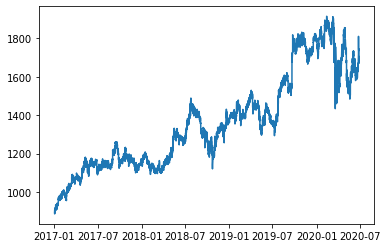

In [ ]:
#checking if time series is stationary
plt.plot(data)
#not staationary because it is increasing over time

In [ ]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(50000).mean()
    rolstd = timeseries.rolling(50000).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    for i in range(0,timeseries.size,50000):
      dicky_fuller_test(timeseries,i,i+50000)
    
    

In [ ]:
def dicky_fuller_test(timeseries,l,r):
  X=timeseries["close"]
  #print(X.size)
  if r<X.size :
    result=adfuller(X[l:r])
  else:
    result=adfuller(X[l:X.size])
    r=X.size
  print('\n\nFor range %d,%d ' %(l,r))
  print('ADF statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values: ')
  for key,value in result[4].items():
    print('\t%s: %.3f' %(key,value))
  
  if result[0]<result[4]['5%']:
    print ('Time Series is Stationary')
  else:
    print ('Time Series is not Stationary')
    


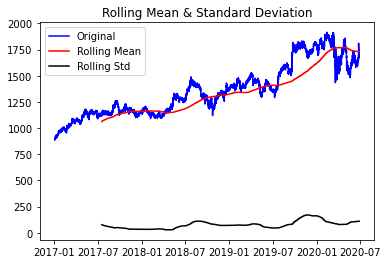

Results of Dickey-Fuller Test:


For range 0,50000 
ADF statistic: -2.114555
p-value: 0.238702
Critical Values: 
	1%: -3.430
	5%: -2.862
	10%: -2.567
Time Series is not Stationary


For range 50000,100000 
ADF statistic: -2.782299
p-value: 0.060847
Critical Values: 
	1%: -3.430
	5%: -2.862
	10%: -2.567
Time Series is not Stationary


For range 100000,150000 
ADF statistic: -0.237156
p-value: 0.933945
Critical Values: 
	1%: -3.430
	5%: -2.862
	10%: -2.567
Time Series is not Stationary


For range 150000,200000 
ADF statistic: -1.861245
p-value: 0.350507
Critical Values: 
	1%: -3.430
	5%: -2.862
	10%: -2.567
Time Series is not Stationary


For range 200000,250000 
ADF statistic: -1.279510
p-value: 0.638494
Critical Values: 
	1%: -3.430
	5%: -2.862
	10%: -2.567
Time Series is not Stationary


For range 250000,300000 
ADF statistic: -3.251190
p-value: 0.017206
Critical Values: 
	1%: -3.430
	5%: -2.862
	10%: -2.567
Time Series is Stationary


For range 300000,321225 
ADF statistic: -1.56320

In [ ]:
test_stationarity(data) 


## **Making the Data Stationary**


### **Applying Log**

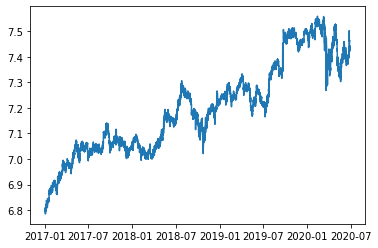

In [ ]:
#trying to make data stationary by applying log
ts_log=np.log(data)
plt.plot(ts_log)

,close
new_timestamp,
2017-01-02 09:15:00,NaN
2017-01-02 09:16:00,NaN
2017-01-02 09:17:00,NaN
2017-01-02 09:18:00,NaN
2017-01-02 09:19:00,NaN


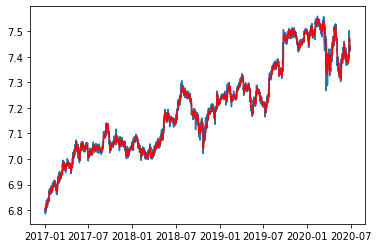

In [ ]:
##trying to make data stationary by applying log

rolmean = ts_log.rolling(500).mean()
plt.plot(ts_log)
plt.plot(rolmean, color='red')
diff_ts_log_rolmean=ts_log-rolmean
diff_ts_log_rolmean.head()

In [ ]:
diff_ts_log_rolmean.dropna(inplace=True)
#test_stationarity(diff_ts_log_rolmean) 



### **Applying Exponentially Weighted Moving Average(EWMA)**


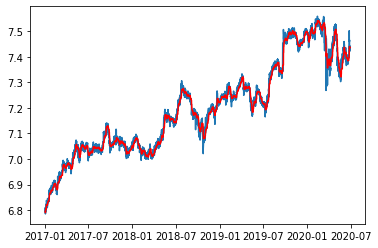

In [ ]:
##trying exponentially weighted moving average 
expweighted_avg=ts_log.ewm(halflife=500).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg, color='red')
 

In [ ]:

diff_ts_log_exp=ts_log-expweighted_avg
diff_ts_log_exp.head()

,close
new_timestamp,
2017-01-02 09:15:00,0.000000
2017-01-02 09:16:00,0.000447
2017-01-02 09:17:00,-0.000149
2017-01-02 09:18:00,-0.000699
2017-01-02 09:19:00,0.000336


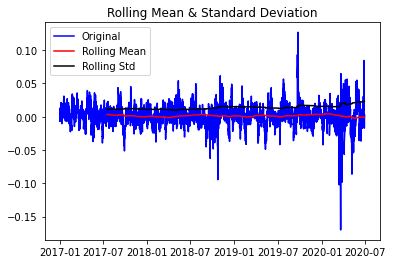

Results of Dickey-Fuller Test:


For range 0,50000 
ADF statistic: -6.647206
p-value: 0.000000
Critical Values: 
	1%: -3.430
	5%: -2.862
	10%: -2.567
Time Series is Stationary


For range 50000,100000 
ADF statistic: -6.452712
p-value: 0.000000
Critical Values: 
	1%: -3.430
	5%: -2.862
	10%: -2.567
Time Series is Stationary


For range 100000,150000 
ADF statistic: -7.041464
p-value: 0.000000
Critical Values: 
	1%: -3.430
	5%: -2.862
	10%: -2.567
Time Series is Stationary


For range 150000,200000 
ADF statistic: -6.503411
p-value: 0.000000
Critical Values: 
	1%: -3.430
	5%: -2.862
	10%: -2.567
Time Series is Stationary


For range 200000,250000 
ADF statistic: -5.749891
p-value: 0.000001
Critical Values: 
	1%: -3.430
	5%: -2.862
	10%: -2.567
Time Series is Stationary


For range 250000,300000 
ADF statistic: -6.662986
p-value: 0.000000
Critical Values: 
	1%: -3.430
	5%: -2.862
	10%: -2.567
Time Series is Stationary


For range 300000,321225 
ADF statistic: -3.282869
p-value: 0.015662


In [ ]:
test_stationarity(diff_ts_log_exp)

### **Performing difference**

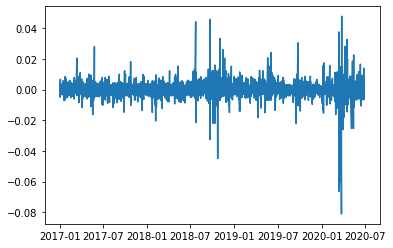

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [ ]:
ts_log_diff.dropna(inplace=True)
#test_stationarity(ts_log_diff)

## **Removing Seasonality and Trend**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose



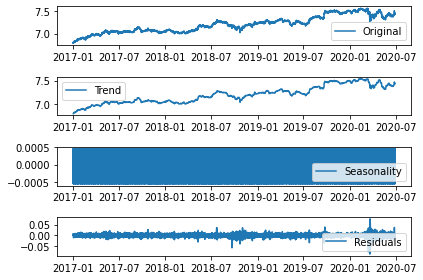

In [ ]:
decomposition = seasonal_decompose(ts_log,freq=500)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
#test_stationarity(ts_log_decompose)

## **Determining the hyperparameter p,d,q**

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff[0:500], nlags=50)
lag_pacf = pacf(ts_log_diff[0:500], nlags=50, method='ols')


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Partial Autocorrelation Function')

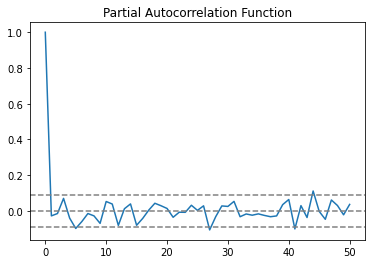

In [ ]:
#Plot PACF:

plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff[0:500])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff[0:500])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
#p=1(approx)

Text(0.5, 1.0, 'Autocorrelation Function')

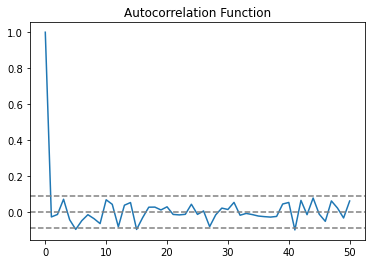

In [ ]:
#Plot ACF: 

plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff[0:500])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff[0:500])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#q=1(approx)

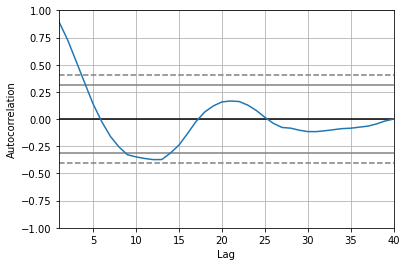

In [ ]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
%matplotlib inline
autocorrelation_plot(ts_log[0:40])
pyplot.show()
#p=3 or 4

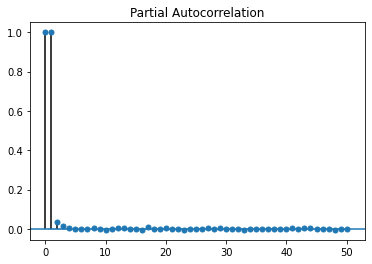

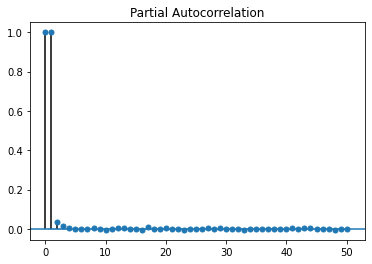

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ts_log,lags=50)
# q=2 or 3


## **Training ARIMA Model**




/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


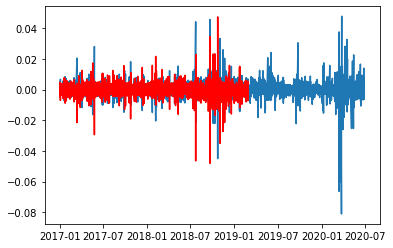

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log[0:200000], order=(4,2,2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff[0:500])**2))


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(ts_log[0:199998],results_ARIMA.fittedvalues))
print(rms)

7.086095387709632


In [ ]:
results_ARIMA.fittedvalues

new_timestamp
2017-01-02 09:17:00   -1.454049e-09
2017-01-02 09:18:00    8.227370e-04
2017-01-02 09:19:00    6.246085e-04
2017-01-02 09:20:00   -1.050133e-03
2017-01-02 09:21:00    7.686499e-04
                           ...     
2019-02-27 12:30:00   -7.151147e-04
2019-02-27 12:31:00    3.286755e-04
2019-02-27 12:32:00    1.235205e-03
2019-02-27 12:33:00    2.669046e-04
2019-02-27 12:34:00    7.028793e-05
Length: 199998, dtype: float64

In [ ]:
import datetime

x_date = datetime.datetime(2019, 2, 27,12,35)
x_end_date=datetime.datetime(2019,2,27,12,40)
prachi=results_ARIMA.predict(start=200000,end=400000);
type(prachi)
prachi

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


199998   -6.476866e-04
199999    3.382529e-05
200000    8.316222e-07
200001    3.517959e-06
200002   -2.625146e-06
              ...     
399994   -1.454049e-09
399995   -1.454049e-09
399996   -1.454049e-09
399997   -1.454049e-09
399998   -1.454049e-09
Length: 200001, dtype: float64

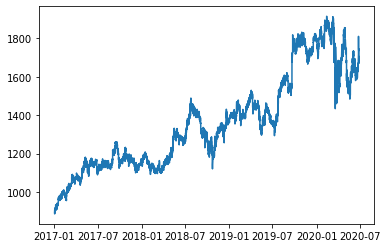

In [ ]:

plt.plot(data)

## **Bringing the data back to non-stationary** 

new_timestamp
2017-01-02 09:17:00   -1.454049e-09
2017-01-02 09:18:00    8.227370e-04
2017-01-02 09:19:00    6.246085e-04
2017-01-02 09:20:00   -1.050133e-03
2017-01-02 09:21:00    7.686499e-04
dtype: float64
new_timestamp
2017-01-02 09:17:00   -1.454049e-09
2017-01-02 09:18:00    8.227355e-04
2017-01-02 09:19:00    1.447344e-03
2017-01-02 09:20:00    3.972108e-04
2017-01-02 09:21:00    1.165861e-03
dtype: float64


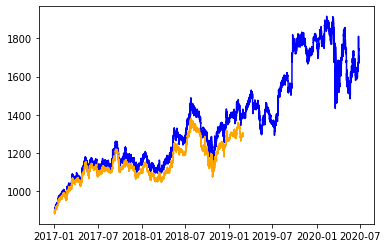

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
#predictions_ARIMA_diff.append(prachi)
print (predictions_ARIMA_diff[0:5])
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum[0:5])
predictions_ARIMA_log = pd.Series(ts_log.iloc[0:200000,0], index=ts_log.index[0:200000])
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data, color='blue')
plt.plot(predictions_ARIMA,color="orange")

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(data[0:200000],predictions_ARIMA))
print(rms)

60.85896259981444


In [ ]:
#2020-08-14 18:00:00
predictions=results_ARIMA.predict(start = len(ts_log[0:199998]),  
                          end = len(ts_log[0:200000]) ,  
                          typ = 'levels').rename('Forecast') 
predictions_ARIMA_diff = pd.Series(predictions, copy=True)
#print predictions_ARIMA_diff.head()
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
#print predictions_ARIMA_diff_cumsum.head()
predictions_ARIMA_log = pd.Series(ts_log.iloc[:,0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
#plt.plot(predictions_ARIMA)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(data,predictions_ARIMA[0:321225]))
print(rms)

ValueError: ignored